In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai import *
from fastai.vision import *
np.random.seed(42)

In [ ]:
!wget https://www.dropbox.com/s/w38wpneldx9k05x/baby_cry.zip?dl=0 -nc -O baby_cry.zip

In [ ]:
!unzip -o baby_cry.zip

In [13]:
images_path = Path('baby_cry')
images_path

PosixPath('baby_cry')

In [14]:
len(images_path.ls())

9335

In [15]:
data = ImageDataBunch.from_csv(images_path, 
                               ds_tfms=get_transforms(do_flip=False, max_rotate=0., max_lighting=0., max_warp=0.), 
                               size=224)
data.normalize(imagenet_stats)

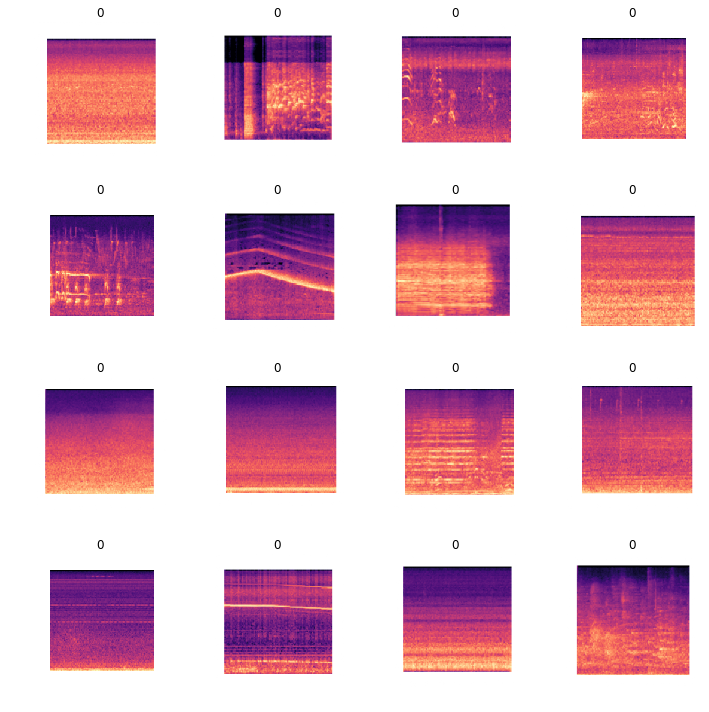

In [16]:
data.show_batch(rows=4, figsize=(10, 10))

In [17]:
print(len(data.classes))
print(data.classes)

2
[0, 1]


In [18]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [19]:
learn.fit_one_cycle(4)

Total time: 01:15
epoch  train_loss  valid_loss  error_rate
1      0.230306    0.044941    0.013641    (00:20)
2      0.064882    0.024116    0.007345    (00:18)
3      0.027049    0.014419    0.005771    (00:18)
4      0.014435    0.012575    0.004722    (00:18)



In [20]:
learn.save('stage-1')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

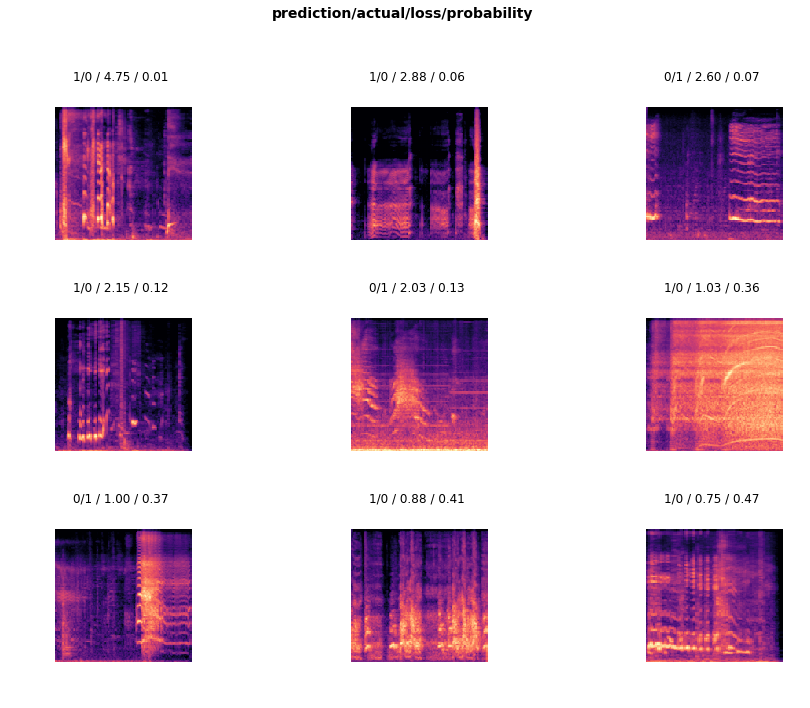

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

In [23]:
interp.most_confused(min_val=1)

[(0, 1, 6), (1, 0, 3)]

In [24]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(2, max_lr=slice(3*1e-5, 3*1e-4))

Total time: 00:48
epoch  train_loss  valid_loss  error_rate
1      0.038730    0.010820    0.003673    (00:24)
2      0.015829    0.003342    0.000000    (00:24)



In [29]:
learn.save('stage-2')

# Inference

In [30]:
classes = [0, 1]
data2 = ImageDataBunch.single_from_classes(images_path, classes, 
                                           tfms=get_transforms(do_flip=False, max_rotate=0., max_lighting=0., max_warp=0.), 
                                           size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')

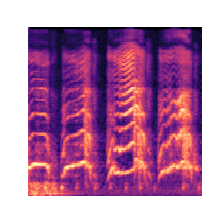

In [31]:
img = open_image(images_path/'9_63.png')
img

In [32]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

1

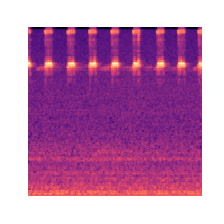

In [33]:
img2 = open_image(images_path/'101729-0-0-26.png')
img2

In [34]:
pred_class, pred_idx, outputs = learn.predict(img2)
pred_class

0